In [30]:
#Import the library
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [31]:
# Loading the CSV with pandas
df = pd.read_csv(r"C:\Users\srshp\Desktop\AI Skunks\Churn_Train.csv")
df

,CustomerID,Gender,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [32]:
#get number of rows and columns in the dataset
df.shape

(6499, 21)

In [33]:
#display column names
df.columns.values

array(['CustomerID', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection',
       'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract',
       'Paperless Billing', 'Payment Method', 'Monthly Charges',
       'Total Charges', 'Churn'], dtype=object)

In [34]:
#Check for na or missing data
df.isna().sum()

CustomerID           0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure               0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        9
Churn                0
dtype: int64

In [35]:
#remove missing values
df.dropna(inplace=True)


In [36]:
#statistics of the data
df.describe()

,Senior Citizen,Tenure,Monthly Charges,Total Charges
count,6490.000000,6490.000000,6490.000000,6490.000000
mean,0.162712,32.414022,64.773752,2282.935177
std,0.369131,24.572143,30.127464,2270.034922
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.412500,399.300000
50%,0.000000,29.000000,70.400000,1397.100000
75%,0.000000,56.000000,89.887500,3786.612500
max,1.000000,72.000000,118.750000,8684.800000


In [37]:
#Get the number of customers that churned
df['Churn'].value_counts()

No     4775
Yes    1715
Name: Churn, dtype: int64

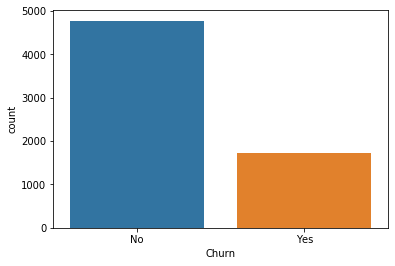

In [38]:
#Visualize the count of customer churn
sns.countplot(df['Churn'])

In [39]:
#What percentage of customers are leaving ?
retained = df[df.Churn == 'No']
churned = df[df.Churn == 'Yes']
num_retained = retained.shape[0]
num_churned = churned.shape[0]
#Print the percentage of customers that stayed and left
print( num_retained / (num_retained + num_churned) * 100 , "% of customers stayed with the company.")
#Print the percentage of customers that stayed and left
print( num_churned / (num_retained + num_churned) * 100,"% of customers left the company.")

73.57473035439138 % of customers stayed with the company.
26.42526964560863 % of customers left the company.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000024BEB209F60>,
      dtype=object)

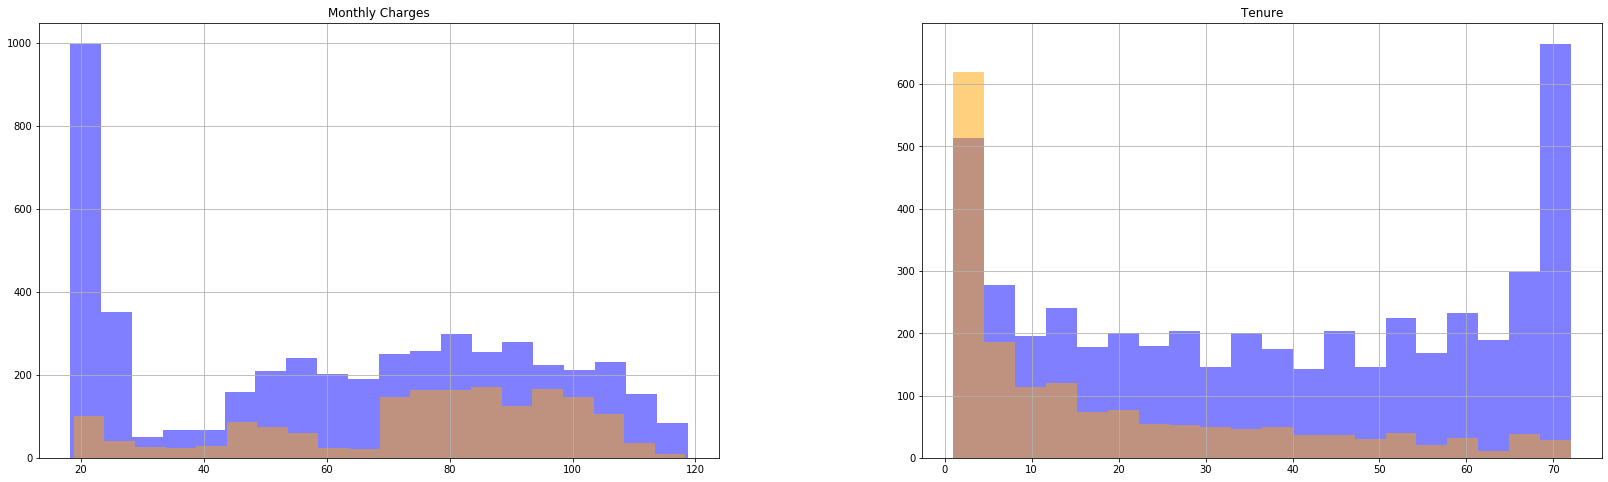

In [40]:
#histogram
numerical_features = ['Tenure', 'Monthly Charges']
fig, ax = plt.subplots(1, 2, figsize=(28, 8))
df[df.Churn == 'No'][numerical_features].hist(bins=20, color="blue", alpha=0.5, ax=ax)
df[df.Churn == 'Yes'][numerical_features].hist(bins=20, color="orange", alpha=0.5, ax=ax)

In [41]:
#remove redundant columns,here it is CustomerID
cleaned_df = df = df.drop('CustomerID', axis=1)

In [42]:
#view the cleaned dataset
cleaned_df

,Gender,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [43]:
#get number of rows and columns of the cleaned dataset
cleaned_df.shape

(6490, 20)

In [44]:
#Convert all the non-numeric columns to numerical data types
for column in cleaned_df.columns:
   if cleaned_df[column].dtype == np.number:
      continue
   cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])

In [45]:
#Check the new data set data types
cleaned_df.dtypes

Gender                 int32
Senior Citizen         int64
Partner                int32
Dependents             int32
Tenure                 int64
Phone Service          int32
Multiple Lines         int32
Internet Service       int32
Online Security        int32
Online Backup          int32
Device Protection      int32
Tech Support           int32
Streaming TV           int32
Streaming Movies       int32
Contract               int32
Paperless Billing      int32
Payment Method         int32
Monthly Charges      float64
Total Charges        float64
Churn                  int32
dtype: object

In [46]:
cleaned_df.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,0,0,1,0,0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,33,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,1,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,44,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [47]:
#Scale the cleaned data
X = cleaned_df.drop('Churn', axis = 1) 
y = cleaned_df['Churn']
#Standardizing/scaling the features
X = StandardScaler().fit_transform(X)

In [48]:
#Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
#Create the model
model = LogisticRegression()
#Train the model
model.fit(x_train, y_train)

C:\Users\srshp\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
predictions = model.predict(x_test)
#printing the predictions
print(predictions)

[0 0 0 ... 1 0 0]


In [51]:
#Check precision, recall, f1-score
print( classification_report(y_test, predictions) )

              precision    recall  f1-score   support

           0       0.85      0.90      0.88       976
           1       0.64      0.52      0.57       322

    accuracy                           0.81      1298
   macro avg       0.74      0.71      0.72      1298
weighted avg       0.80      0.81      0.80      1298



In [ ]:
ABSTRACT
Customer Churn occurs when subscribers or customers stop doing business with a company or service. A business typically treats a customer as churned once a specific amount of time has passed since the customers last interaction with the business or service.Retaining customers is obviously important for companies, because it boosts that companies revenue and helps the company to build a meaningful relationship with the customer. What might not be so obvious is that customer retention is actually more valuable than customer acquisition and there is a lot of data to back this claim.
In this project, I took a dataset and aimed to classify if a customer is churned or not. Before building any machine learning model, it is important that we clean the data and do the necessary preprocessing for accurate results. So, I started with some basic data analysis like removing missing values, calculating the statistics of data like longest tenure and maximum monthly charge. Then I went on to find out the number of customers who were retained and that who were churned. To take a look visually at the tenure and monthly charges columns to see if there is any discrimination for customer churn I created a histogram plot. After completing this I removed redundant columns that do not add any value to the model and then converted all non-numeric columns / categorical columns to numerical columns. I performed the data scaling for the values to be between 0 and 1 and then split the data into train and test datasets with 80% of the data being used for training the model and 20% for testing it. As this is a binary classification problem, I felt logistic regression would be a good one. To evaluate the logistic regression model, I printed the predictions and used some test statistics like precision, recall and the f-1 score.


In [ ]:
CONCLUSION
From the test statistics, I can see that the recall of the model is about 90% meaning the model correctly identified about 90% of the customers that were retained and missed about 10%.The precision of the model was about 85% and the f1-score was about 88%. The accuracy of the model was about 81%.
